Всі імпорти рекомендую розташувати отут зверху для зручності.

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Завантажте дані у pandas dataframe з файла `ecommerce_data.csv`. Обовʼязково при завантаженні вкажіть параметр `encoding = 'ISO-8859-1'`, без нього буде помилка.

In [108]:
df = pd.read_csv('../data/ecommerce_data_1.csv', encoding = 'ISO-8859-1')

Виведіть перші три записи в завантаженому наборі даних

In [109]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


Перейменуйте колонки, для цього просто запустіть код нижче та зверніть увагу, як ми перейменували колонки. Перейменування тут - просто для зручності. 

In [110]:
df.rename(columns={
 'InvoiceNo': 'invoiceno',
 'StockCode' : 'stockcode',
 'Description' : 'description',
 'Quantity' : 'quantity',
 'InvoiceDate' : 'invoicedate',
 'UnitPrice' : 'unitprice',
 'CustomerID' : 'custid',
 'Country' : 'country'}, inplace=True)

Виведіть поточні назви колонок.

In [111]:
df.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'custid', 'country'],
      dtype='object')

# Базове розуміння даних

Виведіть кількість колонок і стовпців в наборі даних.

In [112]:
df.shape

(541909, 8)

Виведіть типи даних в кожній з колонок. Будь-яким способом, але аби для Вас як для дослідника стало зрозуміло, з якими даними ми зараз маємо справу.

In [113]:
df.dtypes

invoiceno       object
stockcode       object
description     object
quantity         int64
invoicedate     object
unitprice      float64
custid         float64
country         object
dtype: object

Очікуваний результат (один з):

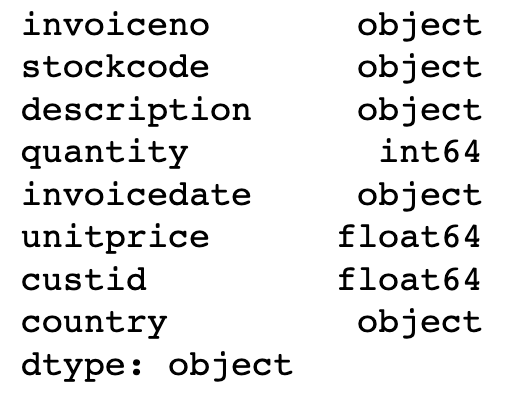

Виведіть кількість пустих (null) значень в кожній з колонок за спаданням цієї кількості.

In [114]:
df.isna().sum()

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
custid         135080
country             0
dtype: int64

Очікуваний результат:

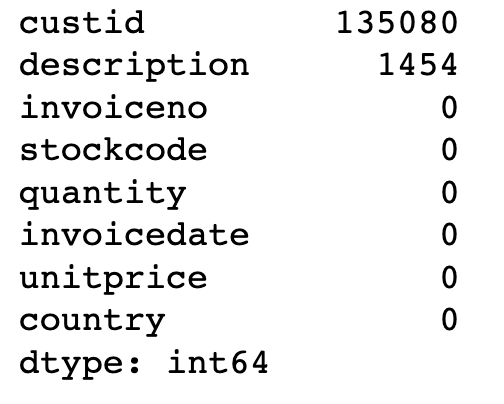

### Конвертація дат

Конвертуйте дату колонки `invoicedate` у тип `datetime64[ns]`.

In [115]:
df['invoicedate'] = pd.to_datetime(df['invoicedate'], format='%m/%d/%Y %H:%M')

Запустіть код нижче:

In [116]:
df.invoicedate[:2]

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
Name: invoicedate, dtype: datetime64[ns]

Очікуваний результат:

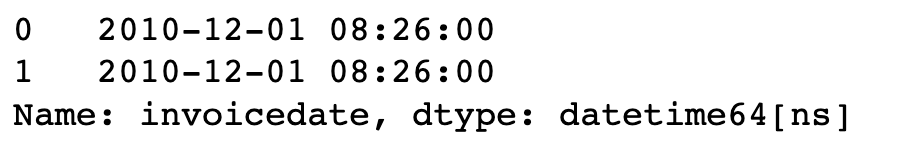

# Чистка даних

### Прибираємо пусті значення (NA)

Приберіть всі пусті значення з набору даних `df` і запишіть результат у нову змінну `df_new`.

In [117]:
df_new = df.dropna()

Виведіть кількість колонок і рядків в `df_new`.

In [118]:
df_new.shape[0]

406829

Виведіть, який відсоток (від 0 до 100%) рядків ми видалили з `df`, коли прибрали пусті значення? Округліть результат до цілих відсотків.

In [119]:
print(f'{round(((len(df) - len(df_new))/len(df)*100))}%')

25%


Очікуваний результат: `25%`

### Приберемо негативні значення `quantity`

Виведіть мінімальне, максимальне і середнє значення колонки `quantity`. Найкраще згадати, як це зробити одною командою, що дозволяє "описати" колонки в датафреймі :)

In [120]:
df['quantity'].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: quantity, dtype: float64

Скажімо, нас не цікавлять записи з негативними quantity (бо це поверненння).   
Приберіть всі рядки, де `quantity` менше 0 з набора даних `df_new` і запишіть в той самий набір даних `df_new`.

In [121]:
df_new = df_new[df_new['quantity'] > 0]

# Обробка даних

### Зміна типу даних `custid`

Ідентифікатор клієнта має мати тип "рядок" для простоти роботи з цією колонкою. Бо інакше пандас буде інтерпретувати цю колонку як число - а це логічно не правильно.
Перетворіть тип даних колонки `custid`  спочатку на int, а потім на рядок. Або можете зробити ці перетворення в одній функції (лямбді).

In [122]:
df_new['custid'] = df_new['custid'].apply(lambda x: str(int(x)))


In [123]:
df_new['custid']

0         17850
1         17850
2         17850
3         17850
4         17850
          ...  
541904    12680
541905    12680
541906    12680
541907    12680
541908    12680
Name: custid, Length: 397924, dtype: object

Запустіть код нижче:

In [124]:
df_new['custid'][:3]

0    17850
1    17850
2    17850
Name: custid, dtype: object

Очікуваний результат:

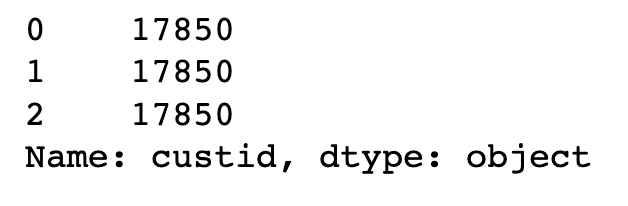

### Додамо колонку `amountspent`

Додайте в `df_new` колонку `amountspent`, яка є добутком колонок `quantity` і `unitprice`.

In [125]:
df_new['amountspent'] = df_new['quantity']*df_new['unitprice']

### Додавання колонок `month`, `day`, `hour`, `yearmonth` для інвойса. 

Використовуючи колонку invoicedate та те, що вона в нас вже має тип datetime, створіть 4 нових колонки в даних: 
- `yearmonth` - рік і місяць інвойсу разом у форматі "2010-12" - тобто 12 місяць 2010го року і тип цієї колонки має бути датою (підказка: просто робимо для колонки`invoicedate` `dt.to_period('M')` для того аби таке отримати)
- `month` - місяць інвойсу
- `day` - день тижня інвойсу (понеділок - це перший, неділя - останній)
- `hour` - година інвойсу

Зробіть також так, аби `yearmonth` була третьою (за рахунком) колонкою в датафреймі, `month` - четвертою, `day` - пʼятою, `hour` - шостою.

In [126]:
df_new['yearmonth'] = df_new['invoicedate'].dt.to_period('M')

In [127]:
df_new['month'] = df_new['invoicedate'].dt.month
df_new['day'] = df_new['invoicedate'].dt.day
df_new['hour'] = df_new['invoicedate'].dt.hour

Запустіть код нижче:

In [128]:
df_new.head(10)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,custid,country,amountspent,yearmonth,month,day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,12,1,8
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30,2010-12,12,1,8
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50,2010-12,12,1,8
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010-12,12,1,8
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010-12,12,1,8
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,2010-12,12,1,8


In [129]:
df_new.dtypes

invoiceno              object
stockcode              object
description            object
quantity                int64
invoicedate    datetime64[ns]
unitprice             float64
custid                 object
country                object
amountspent           float64
yearmonth           period[M]
month                   int32
day                     int32
hour                    int32
dtype: object

Очікуваний результат:

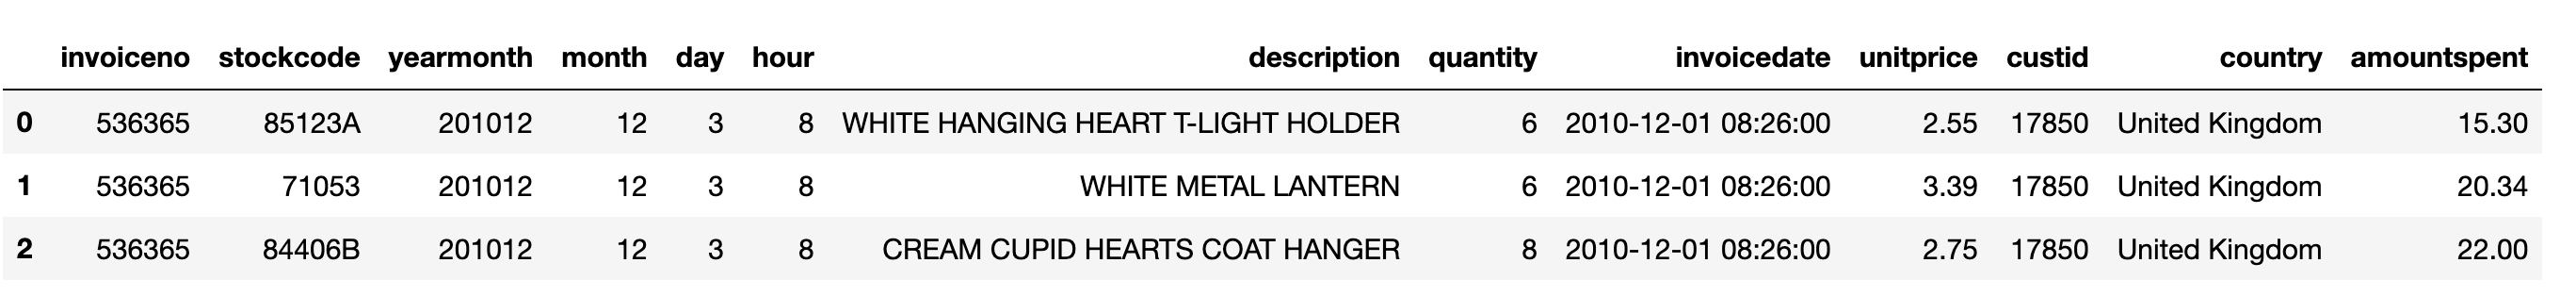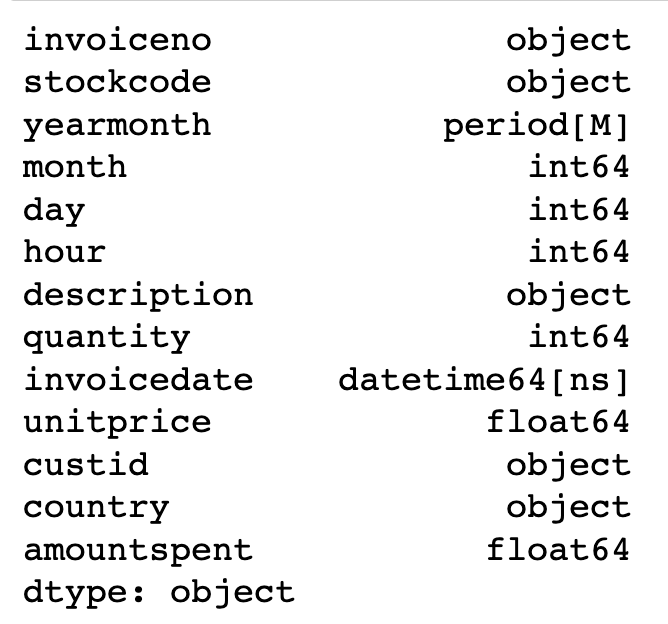

# Базовий Exploratory Data Analysis (EDA)

Побудуйте з допомогою методів візуалізації `pandas` датафрейму (ті що з категорії `df.plot()`) стовпчастий графік кількості унікальних продажів помісячно за весь наявний період в даних. Зробіть так, аби підписи дат були нахилені під кутом 45 градусів для зручнішого перегляду.
Кількість унікальних продажів - це кількість унікальних інвойсів. 

Підказка: для візуалізації нам спочатку треба агреугувати дані помісячно. 

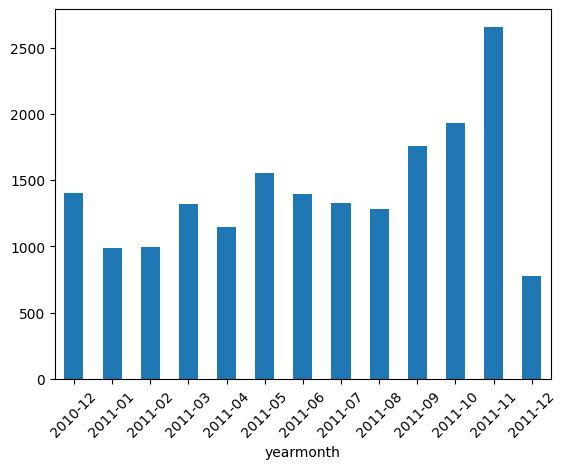

In [130]:
df_new.groupby('yearmonth')['invoiceno'].nunique().plot.bar()
plt.xticks(rotation=45);

Очікуваний результат:

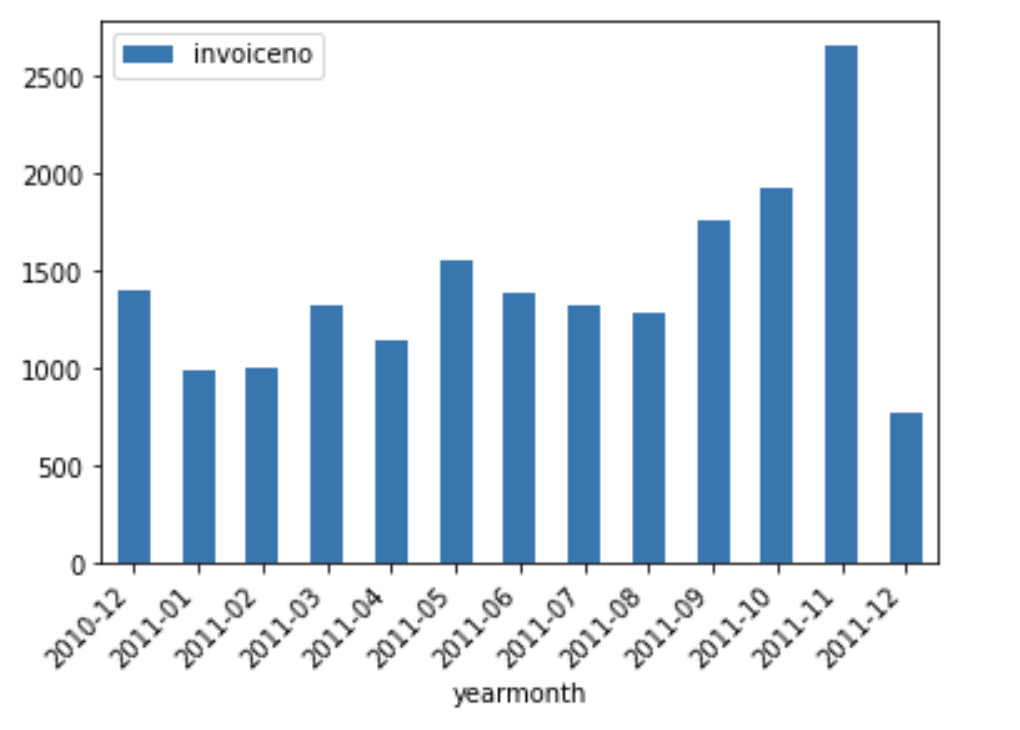

Побудуйте стовпчастий графік кількості унікальних інвойсів для топ 10 клієнтів за цим показником.

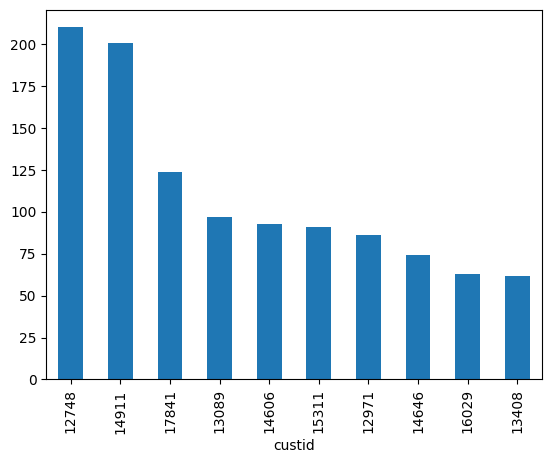

In [131]:
df_new.groupby('custid')['invoiceno'].nunique().sort_values(ascending=False)[:10].plot.bar();

Очікуваний результат:

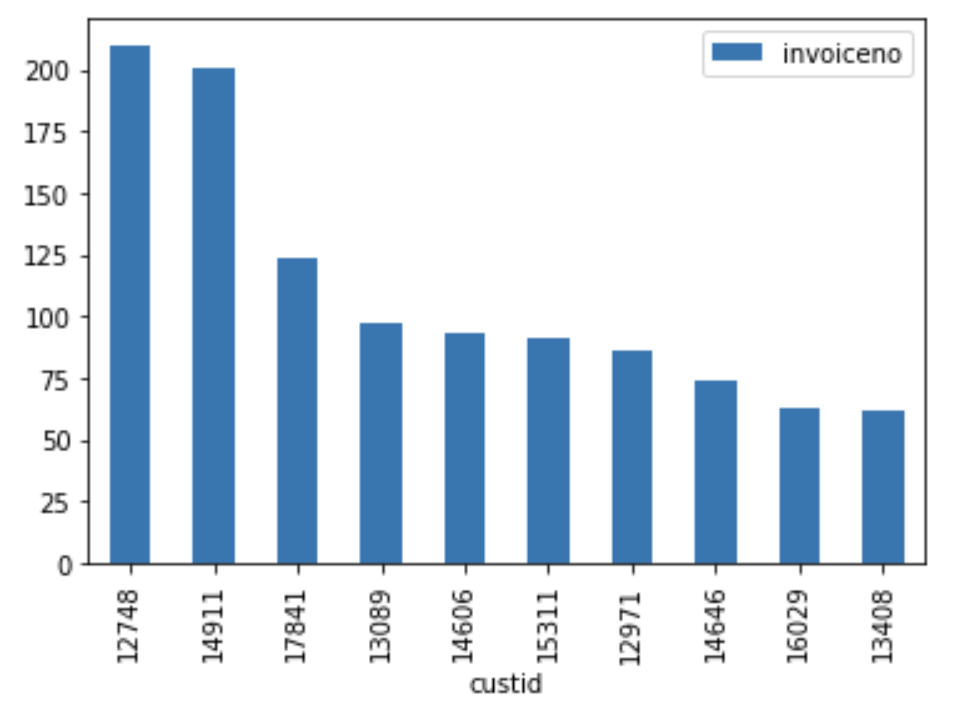

Створіть новий датафрейм, що містить сумарний `amountspent` по кожному.

In [132]:
df_amountspent_by_custid = df_new.groupby('custid')['amountspent'].sum()

Використовуючи датафрейм з попереднього пункту, виведіть, якими є 10, 25, 50, 75 і 90 персентилі сумарних витрат клієнтів за розглянутий період:

In [133]:
df_amountspent_by_custid.describe()

count      4339.000000
mean       2053.793018
std        8988.248381
min           0.000000
25%         307.245000
50%         674.450000
75%        1661.640000
max      280206.020000
Name: amountspent, dtype: float64

Очікуваний результат:

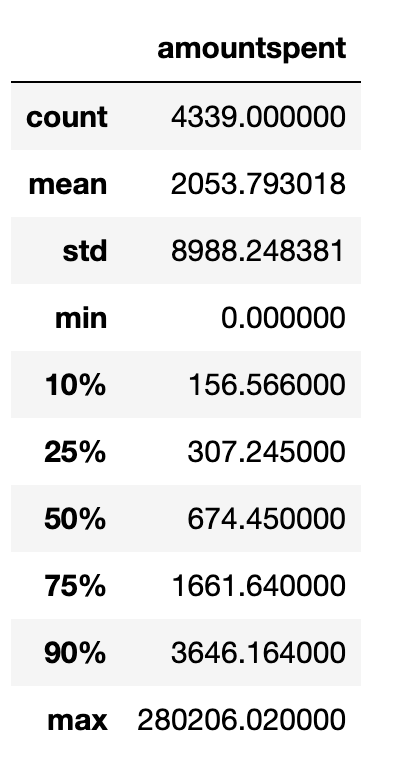

Скільки унікальних клієнтів мають сумарні витрати вищі, ніж 90-тий персентиль в попередньому завдані?

In [134]:
round(4339.00-(4339.0*90/100))

434

Відповідь - таких клієнтів 434.

Виведіть середню суму покупок в мережі по дням тижня. Дні тижня мають йти в звичному порядку Monday, Tuesday і т.д.

In [135]:
df_new['name_day_1'] = pd.Categorical(df_new['invoicedate'].dt.day_name(), 
                                   categories=['Monday','Tuesday', 'Wednesday','Thursday',
                                              'Friday','Saturday','Sunday'],
                                   ordered=True)

In [136]:
pivot_day_name = df_new.pivot_table(index='name_day_1', values='amountspent', aggfunc='mean')

In [137]:
pivot_day_name

,amountspent
name_day_1,
Monday,21.065755
Tuesday,25.582686
Wednesday,23.056790
Thursday,24.694687
Friday,27.098468
Sunday,12.624679


In [138]:
# сердній дохід по длям тижня
grouped_name_day = df_new.groupby('name_day_1', observed=False)['amountspent'].agg(['mean','sum', 'count'])
grouped_name_day['mean incom'] = grouped_name_day['sum']/grouped_name_day['count']

In [139]:
grouped_name_day

,mean,sum,count,mean incom
name_day_1,,,,
Monday,21.065755,1367146.411,64899,21.065755
Tuesday,25.582686,1700634.631,66476,25.582686
Wednesday,23.056790,1588336.170,68888,23.056790
Thursday,24.694687,1976859.070,80052,24.694687
Friday,27.098468,1485917.401,54834,27.098468
Saturday,NaN,0.000,0,NaN
Sunday,12.624679,792514.221,62775,12.624679


## Дослідимо продажі на суму 0 умовних одиниць

Можна було помітити вище, що в нас є продажі на суму 0. Дослідимо їх. Створіть новий датафрейм з тільки такими продажами.

In [140]:
df_null_amount = df_new[df_new['amountspent'] == 0]

### Динаміка продажів на суму 0

Зобразіть у вигляді стовпчастої діаграми помісячну динаміку продажів на суму 0. 

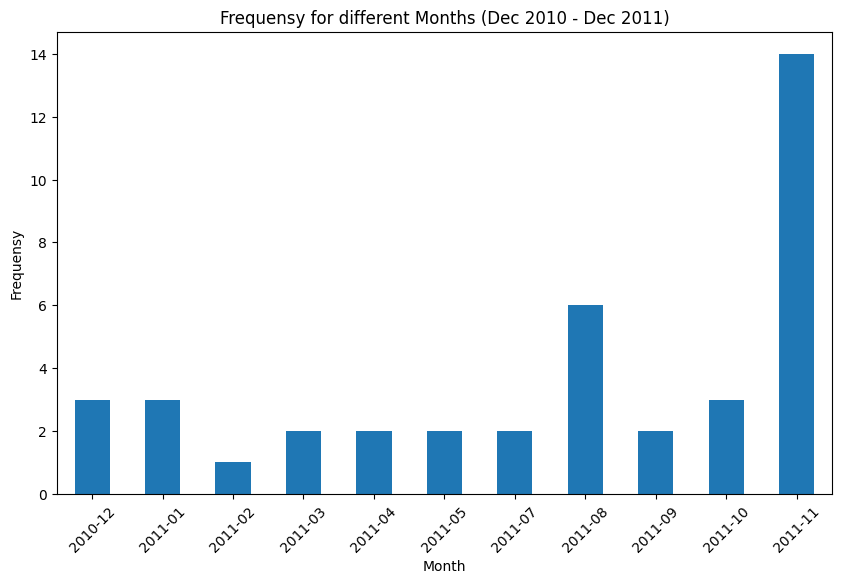

In [141]:
plt.figure(figsize=(10,6))
       
df_null_amount.groupby('yearmonth')['amountspent'].count().plot.bar()

plt.title('Frequensy for different Months (Dec 2010 - Dec 2011)')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Frequensy');

Очікуваний результат:

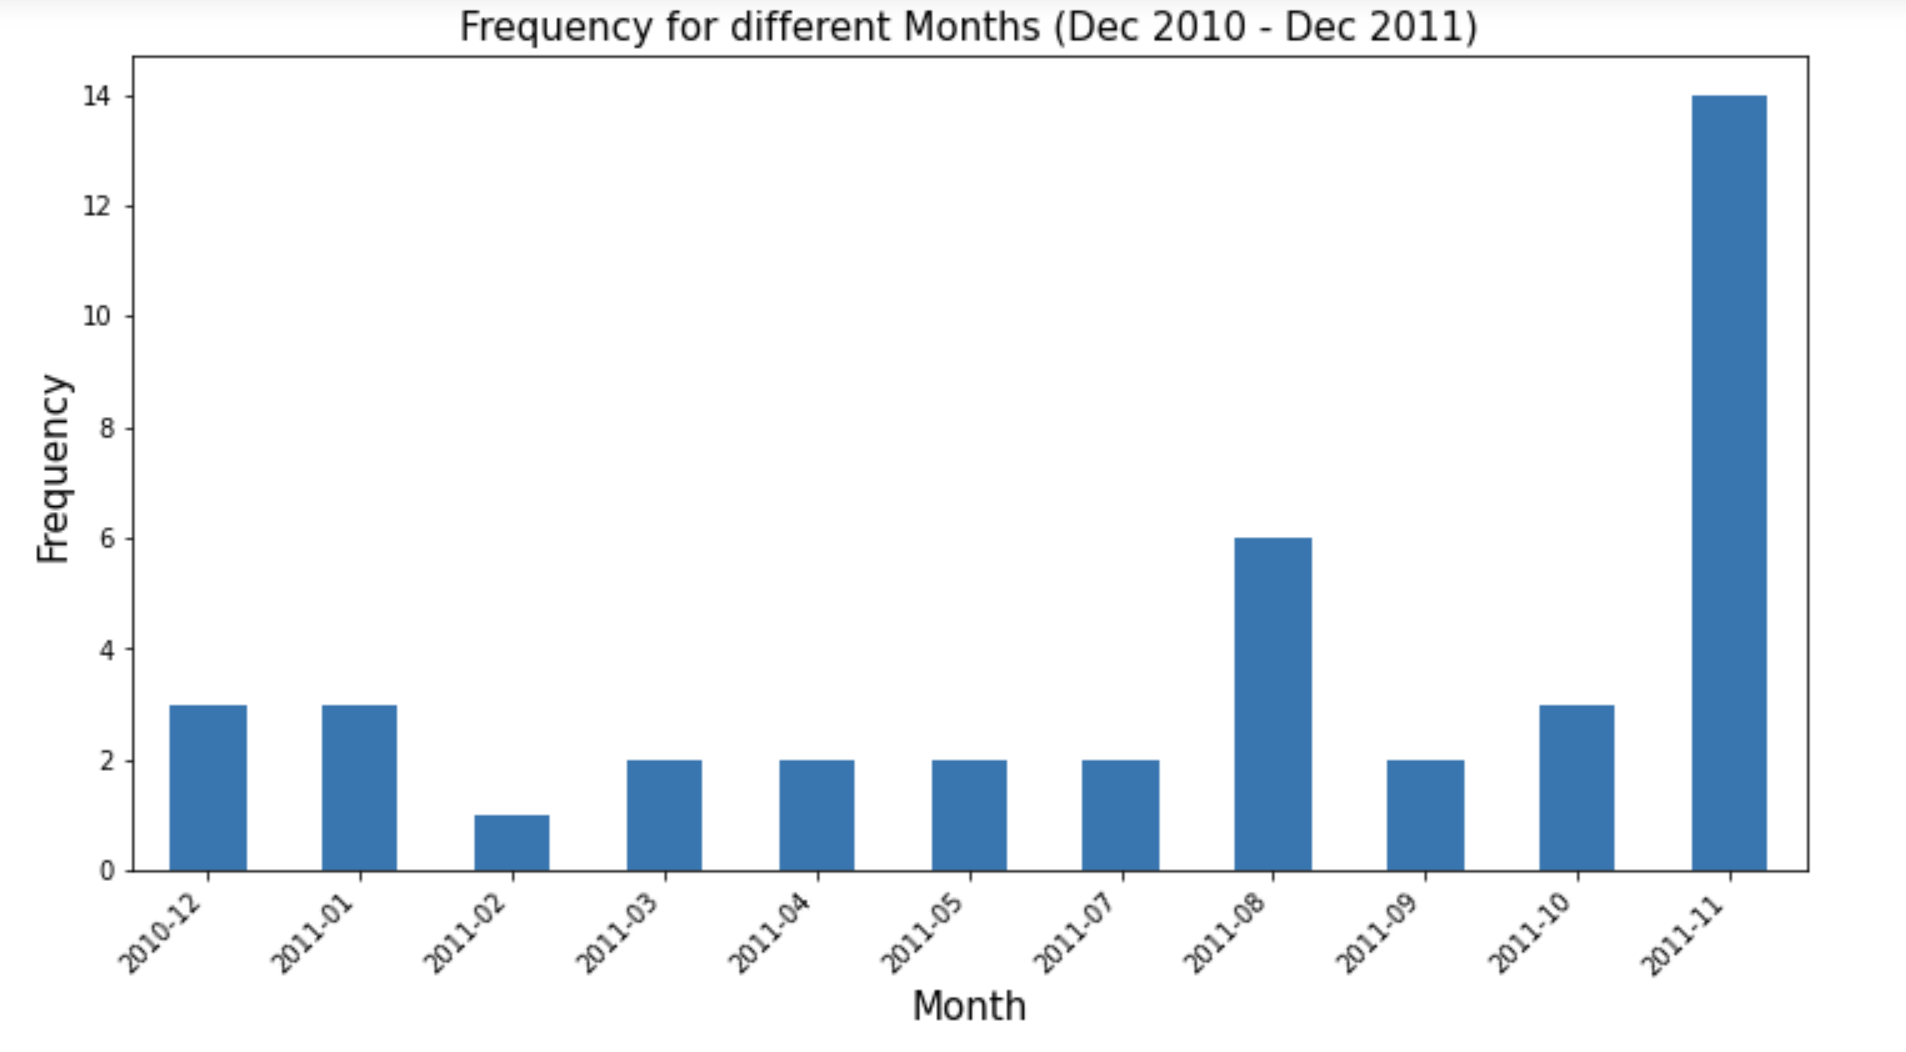

Згрупуйте дані за країнами та підрахуйте кількість унікальних інвойсів з сумою 0 для кожної країни. Виведіть у вигляді датафрейму.

In [142]:
df_country_null = (
    df_null_amount.groupby('country')['invoiceno'].
    nunique().sort_values(ascending=False).reset_index(name='num_ordes')
)
df_country_null

,country,num_ordes
0,United Kingdom,21
1,Australia,3
2,EIRE,2
3,Germany,2
4,France,1
5,Netherlands,1
6,Norway,1
7,RSA,1
8,Spain,1
9,Switzerland,1


Очікуваний результат:

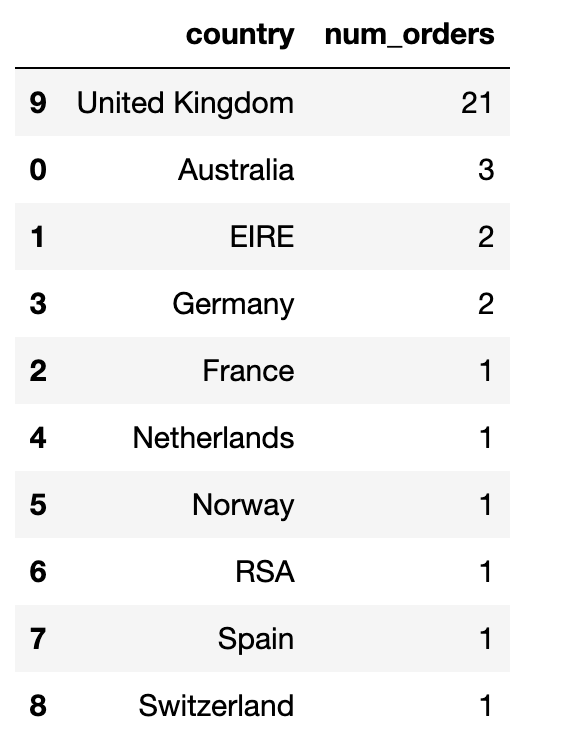

Велике питання, чого магазин так багато порівняно роздавав безкоштовних товарів в UK, але така політика фірми :)

Якщо у вас ще є натхнення, пропоную задати до цих даних ще 3 своїх питання.

1. Які товари приносять найбільний дохід? Як розподілені сумарний дохід від продажу різних товарів? Які товари найменше?

In [143]:
df_max_amount = (
    df_new.groupby('stockcode')['amountspent']
    .sum().sort_values(ascending=False).reset_index(name='totalamount')
)

In [144]:
df_max_amount[:10]

,stockcode,totalamount
0,23843,168469.60
1,22423,142592.95
2,85123A,100603.50
3,85099B,85220.78
4,23166,81416.73
5,POST,77803.96
6,47566,68844.33
7,84879,56580.34
8,M,53779.93
9,23084,51346.20


In [145]:
df_max_amount[df_max_amount['totalamount'] !=0].describe()

,totalamount
count,3665.000000
mean,2431.489196
std,6579.430835
min,0.003000
25%,129.940000
50%,633.960000
75%,2075.390000
max,168469.600000


In [146]:
df_max_amount[df_max_amount['totalamount'] < 130]

,stockcode,totalamount
2748,85039C,129.940
2749,20823,129.560
2750,21319,129.510
2751,21368,129.150
2752,20826,128.400
...,...,...
3660,90084,0.850
3661,90104,0.850
3662,21268,0.840
3663,84227,0.420


2. З яких країн отримується найбільший дохід?

In [147]:
df_new['country'].nunique()

37

In [148]:
df_country_amount = (
    df_new.groupby('country')['amountspent']
    .sum().sort_values(ascending=False)
    .reset_index(name='total_country_amount')
)

In [149]:
df_country_amount

,country,total_country_amount
0,United Kingdom,7308391.554
1,Netherlands,285446.340
2,EIRE,265545.900
3,Germany,228867.140
4,France,209024.050
5,Australia,138521.310
6,Spain,61577.110
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38378.330


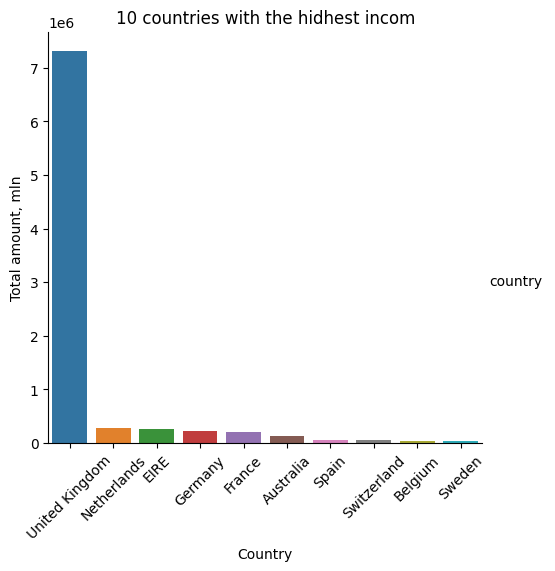

In [150]:
sns.catplot(
data=df_country_amount[:10], x='country', y='total_country_amount', hue='country', kind='bar')

plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Total amount, mln')
plt.title('10 countries with the hidhest incom');

Безперечним лідером є Велика Британія. На клієнтах цієї країни варто зосередити значну частину рекламого бюджету, подумати про спеціальні умови доставки, а також над тим як можна покращити сервіс, наприклад відкрити представництва, пункти видачі товарів тощо.
Поглянемо більш детально на 10 країн які приносять найбільший дохід окрім Британії.

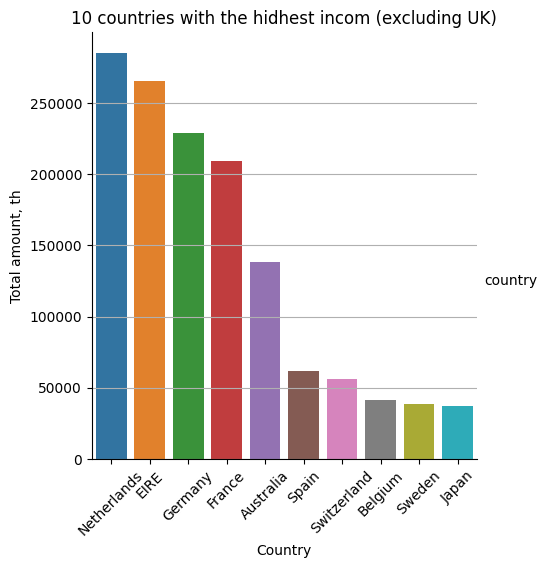

In [151]:
sns.catplot(
data=df_country_amount[1:11], x='country', y='total_country_amount', hue='country', kind='bar')

plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Total amount, th')
plt.title('10 countries with the hidhest incom (excluding UK)')
plt.grid(axis='y');

Можна розглянути пятірку країн, які приносять найбільше доходу після британій як потенійно такі, в яких дохід можна збільшити. Це такі країни: Нідерланди, Ірландія, Германія, Австралія. На ці крахни варто спрамувати рекламні компанії

В який час поступає найбільше замовлеень?

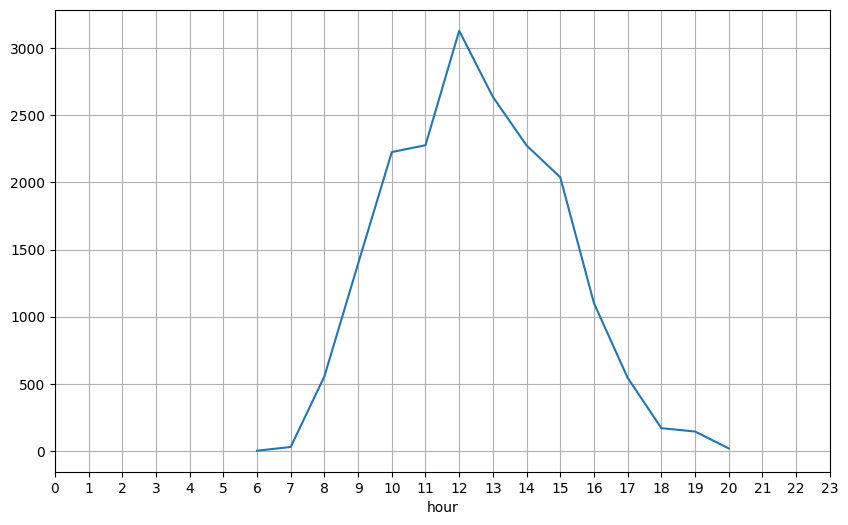

In [152]:
df_new.groupby('hour')['invoiceno'].nunique().plot(figsize=(10,6))

plt.xticks(np.arange(24))
plt.grid(axis='both');

Пік замовлень відбувається о 12 годині. Найбільше замовлень відбувається з 10-ї по 15-у годину. В цей час має бути присутній в достатній кількості персонал магазину для обробки замовлень, консультації та допомоги клієнтам.